<a href="https://colab.research.google.com/github/samuelhtampubolon/SDPM2025/blob/main/Multinomial_Logistic_Regression_Klasifikasi_Multi_Kelas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
#   Memuat & Menyiapkan Data ---
# Kita hanya ambil 2 fitur pertama (sepal length & sepal width) untuk visualisasi
iris = load_iris()
X = iris.data[:, :2]
y = iris.target

In [3]:
#   Latih Model Logistic Regression untuk Multi-kelas ---
# solver='lbfgs' dan multi_class='multinomial' cocok untuk kasus ini
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=42)
model.fit(X, y)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='multinomial', random_state=42)

In [4]:
#   Prediksi & Evaluasi ---
y_pred = model.predict(X)

In [5]:
# Mencetak 2+ hasil evaluasi
print(f"Akurasi Model: {accuracy_score(y, y_pred):.4f}")

Akurasi Model: 0.8200


In [6]:
# Menampilkan 5 prediksi pertama vs. label aktual
print("\nContoh Prediksi vs. Aktual:")
print(f"Prediksi: {y_pred[:5]}")
print(f"Aktual  : {y[:5]}")


Contoh Prediksi vs. Aktual:
Prediksi: [0 0 0 0 0]
Aktual  : [0 0 0 0 0]


In [7]:
#   Tampilkan 2 Visualisasi ---
plt.figure(figsize=(16, 6))

<Figure size 1600x600 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

Text(50.722222222222214, 0.5, 'Aktual')

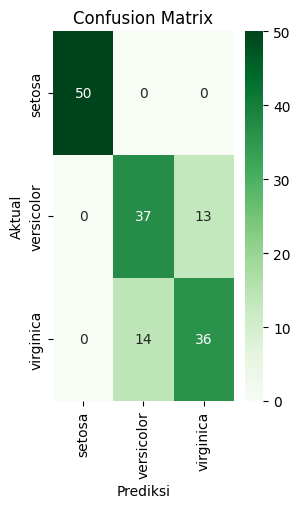

In [8]:
# Visual 1: Confusion Matrix
plt.subplot(1, 2, 1)
cm = confusion_matrix(y, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')

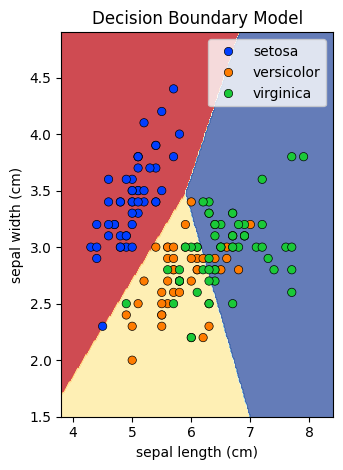

In [9]:
# Visual 2: Decision Boundary (Batas Keputusan)
plt.subplot(1, 2, 2)
# Buat meshgrid untuk plot decision boundary
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.8)
# Plot titik data
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=iris.target_names[y], palette='bright', edgecolor='k')
plt.title('Decision Boundary Model')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend()

plt.tight_layout()
plt.show()